## Física Computacional
## Tarea No.1 

### Francisco Eduardo Enríquez Mier y Terán 

In [1]:
from pylab import *
%matplotlib inline

#### 1. Programación y explicación de los sig. algoritmos de integración de ec. diferenciales

a) Integración con método de Euler 

El método de Euler consiste en encontrar la solución de una ecuación diferencial (graficamente: una curva desconocida) mediante la aproximación por rectas tangentes a la curva. Usando la expansión en serie de Taylor a primer orden de una función analítica es que se puede generar el algoritmo a seguir para encontrar la solución a la ecuación

$$
\Rightarrow y_{n+1} = y_n + f(t_n,y_n)h + O(h^2)
$$

Dada una condición inicial $y_0$ y la ec. diferencial $f(t,y)$ es que se pude encontrar la serie de rectas tangentes, y por ende,la solución a la ecuación diferencial:

Tomando un intervalo de integración $[t_0,t_f]$ y dividiéndolo en n intervalos iguales se tiene: 

$$
h = \frac{t_f - t_0}{n}
$$

siendo más preciso nuesto integrador con $h$ más pequeñas.

De tal manera que nuestra serie de puntos que convergen a la solución de la ecuación diferencial están dados por:

$$
y_1 = y_0 + f(t_0,y_0)h\\
y_2 = y_1 + f(t_1,y_1)h\\
...\\
y_{n+1} = y_n + f(t_n,y_n)h
$$

De igual manera, este mismo algoritmo se puede extender a funciones vectoriales:

$$
\vec y_{n+1} = \vec y_n + \vec f(t_n,\vec y_n)h
$$

A continuación se programa el algoritmo para encontrar la solución de una ec. diferencial de una función vectorial. 
La función $euler\ vec$ pide como argumentos la ec. diferencial a resolver (que debe ser función de $\vec y$ y $t$), las condiciones iniciales ($\vec y_0$), el intervalo de integracion y el paso de integración (que por default es $h = 0.1$).
Primeramente se crea una lista con los tiempos para los cuales se va a resolver la ec. diferencial (de $t_0$ a $t_f$ en pasos de $h$), posteriormente se crea un arreglo de zeros que va a almacenar la solución de la ecuación para los diversos tiempos. Finalmente, la función entra a un ciclo $for$ el cual, usando el algoritmo del método de Euler, encuentra la solución a la ecuación diferencial.


In [2]:
def euler_vec(funcion,p_ini,delta_t,h = 0.1): 
    tiempo = arange(delta_t[0],delta_t[1]+h,h)
    solucion = zeros((len(tiempo),len(p_ini)))
    solucion[0,:] = p_ini
    for i in xrange(len(tiempo)-1):
        solucion[i+1,:] = solucion[i,:]+h*funcion(solucion[i,:],tiempo[i])
    return tiempo,solucion

b) Integración sobre serie de Taylor a 2º orden

El método de Euler puede ser mejorado si  el desarrollo en serie de Taylor, que aproxima a la función por una serie de rectas, es expandido hasta segundo orden. 

$$
\Rightarrow y_{n+1} = y_n + f(t_n,y_n)h + \frac{h^2}{2} f'(t_n,y_n) + O(h^3)
$$

Dada una condición inicial $y_0$ y la ecuación diferencial a resolver $f(t,y)$, se debe de proceder a calcular la derivada de $f$, es decir:

$$
\frac{df(t,y)}{dt} = \frac{\partial f}{\partial t} + \frac{\partial f}{\partial y}\frac{\partial y}{\partial t} = \frac{\partial f}{\partial t} + \frac{\partial f}{\partial y} f(t,y)
$$

De tal manera que la sucesión de puntos que convergen a la solución de la ec. diferencial está dado por:

$$
y_{n+1} = y_n + f(t_n,y_n)h + \frac{h^2}{2}\left (\frac{\partial f}{\partial t} + \frac{\partial f}{\partial y} f(t,y)\right)
$$

De igual manera que en el método de Euler, el integrador puede ser extendido a funciones vectoriales:

$$
\vec y_{n+1} = \vec y_n + h \vec f(t_n,\vec y_n) + \frac{h^2}{2} \left (\frac{\partial \vec f}{\partial t} + \mathbb{J} \vec f(t_n,\vec y_n) \vec f \right)
$$
donde $\mathbb{J}$ denota el jacobiano de la función $\vec f$ evaluado en $(t_n,\vec y_n)$

A continuación se programa el algoritmo para encontrar la solución de una ec.diferencial de una función vectorial usando el método de integración sobre la serie de Taylor a 2º orden. La función $taylor\ 2º\ ord$ pide como argumentos: la ecuación diferencia a resolver, la derivada total de la ecuación diferencial, el punto inicial $\vec y_0$, el intervalo de tiempo para el cual se va resolver la ecuación, y el paso de integración (por default $h = 0.1$)

La función crea la lista de tiempos para los cuales se va resolver la ecuación, posteriormente crea un arreglo de zeros para guardar la solución de la ecuación. En un ciclo $for$ se calcula la solución, mediante la derivada de $\vec f$ respecto de $t$ y el jacobiano de $\vec f$ evaluados en un tiempo $t$ dado. 


In [3]:
def taylor_2ord(funcion,d_funcion,p_ini,delta_t,h= 0.1):
    tiempo = arange(delta_t[0],delta_t[1]+h,h)
    solucion = zeros((len(tiempo),len(p_ini)))
    solucion [0,:] = p_ini
    for j in xrange (len(tiempo)-1):
        func = funcion(solucion[j,:],tiempo[j])
        df,jac = d_funcion(solucion[j,:],tiempo[j])
        solucion [j+1,:] = solucion[j,:]+h*func+(0.5*h*h*(df+dot(jac,func)))
    return tiempo,solucion

c) Integración con Método de Runge-Kutta de 2º orden 

En esencia, los métodos de Runge-Kutta son generalizaciones del método de Euler en los que el valor de la función $f(t_i,y_i)$  se remplaza por un promedio de los valores de f en un intervalo $t_i \leq t \leq t_{i+1}$ 

$$
\Rightarrow y_{n+1} = y_n + hf\left (t_{n+\frac{1}{2}},y_{n+\frac{1}{2}}\right) + O(h^3)
$$

Donde $t_{n+\frac{1}{2}}$ queda en términos de:

$$
t_{n+\frac{1}{2}} = t_{n}+\frac{h}{2}
$$

Y $y_{n+\frac{1}{2}}$, haciendo uso de la Serie de Taylor a primer orden, se puede reescribir como:

$$
y_{n+\frac{1}{2}} = y_n + \frac{h}{2} f(t_n,y_n)
$$

De tal manera que:

$$
y_{n+1} = y_n + hf\left (t_{n}+\frac{h}{2}, y_n + \frac{h}{2} f(t_n,y_n)\right)
$$

Que comunmente, en los libros se representa como:

$$
y_{n+1} = y_n + hf\left (t_{n}+\frac{h}{2}, y_n + \frac{k_1}{2}\right)
$$

Siendo $k_1 = hf(t_n,y_n)$

Asimismo, cabe selañar que el método se puede aplicar a funciones vectoriales:

$$
\vec y_{n+1} = \vec y_n + hf\left (t_{n}+\frac{h}{2},\vec y_n + \frac{k_1}{2}\right)
$$

A continuación se programa el algoritmo para resolver una ecuación diferencial vectorial usando el método de Runge-Kutta a 2º orden. La función $RK\ 2ord$ pide como argumentos: la ecuación diferencial a resolver, la condición inicial $\vec y_0$, el intervalo de tiempo de integración y el paso de integración, siendo $h= 0.1$ por default. La función crea la lista de tiempos para los cuales se encontrará la solución, así como el arreglo de zeros que empezará a guardar la solución a la ecuación. Dentro del ciclo $for$ se calcula el valor de $k$ y $\vec f$ para cada $t$ y $\vec y$ dada, para posteriormente poder calcular la solución del paso $n+1$.


In [4]:
def RK_2ord(funcion,p_ini,delta_t,h=0.1):
    tiempo = arange(delta_t[0],delta_t[1]+h,h)
    solucion = zeros((len(tiempo),len(p_ini)))
    solucion[0,:] = p_ini
    for r in xrange(len(tiempo)-1):
        k = h*funcion(solucion[r,:],tiempo[r])
        f = funcion(solucion[r,:]+(0.5)*k,tiempo[r]+0.5*h)
        solucion[r+1,:] = solucion[r,:]+h*f
    return tiempo,solucion

d) Integración con Método de Runge-Kutta de 4º Orden

El método de Runge-Kutta de cuarto orden consiste (siguiendo un algoritmo similar al de Runge-Kutta de 2º Orden) en encontrar el punto $y_{n+1}$ haciendo uso de las siguientes interpolaciones:

$$
k_1 = f\left(t_n,y_n\right)\\
k_2 = f\left(t_n+\frac{h}{2},y_n+\frac{h}{2}k_1\right)\\
k_3 = f\left(t_n+\frac{h}{2},y_n+\frac{h}{2}k_2\right)\\
k_4 = f\left(t_n+h,y_n +hk_3\right)
$$

De tal manera que el paso $y_{n+1}$ está dado por:
$$
y_{n+1} = y_n +\frac{h}{6}(k_1+2k_2+2k_3+k_4)
$$

Teniendo un error en términos de $O(h^5)$.

De igual manera se puede extender el algoritmo hacia funciones vectoriales:

$$
\vec y_{n+1} = \vec y_n +\frac{h}{6}(k_1+2k_2+2k_3+k_4)
$$

A continuación se programa el algoritmo para resolver una ecuación diferencial de una función vectorial mediante el método de Runge-Kutta de orden 4º. La función $RK\ 4ord$ pide como argumentos la ecuación diferencial a resolver, la condición inicial $\vec y_0$, el intervalo de integración, y el paso de integración (que por default es $h = 0.1$). Dentro de la función, en el ciclo $for$ se calculan los valores de $k_i$ con $i = 1,2,3,4$ para un tiempo $t_n$ dado y una $\vec y_n$ dada, de tal manera que se puede obtener la solución a la ecuación para el punto $\vec y_{n+1}$.

In [5]:
def RK_4ord(funcion,p_ini,delta_t,h=0.1):
    tiempo = arange(delta_t[0],delta_t[1]+h,h)
    solucion = zeros((len(tiempo),len(p_ini)))
    solucion[0,:] = p_ini
    for s in xrange(len(tiempo)-1):
        k1 = funcion(solucion[s,:],tiempo[s])
        k2 = funcion(solucion[s,:]+0.5*h*k1,tiempo[s]+0.5*h)
        k3 = funcion(solucion[s,:]+0.5*h*k2,tiempo[s]+0.5*h)
        k4 = funcion(solucion[s,:]+h*k3,tiempo[s]+h)
        solucion[s+1,:] = solucion[s,:]+(h/6.)*(k1+(2*k2)+(2*k3)+k4)
    return tiempo,solucion

#### A continuación se verifica el funcionamiento de los integradores encontrando una solución para la siguiente ecuación diferencial:

$$
\ddot x + 0.5 \dot x + sin(x) = e^{-t}sin(3t)
$$

Con condiciones iniciales $\dot x(0) = 1$ y $x(0) = 0$

Mediante un cambio de variable apropiado podemos expresar nuestra ec. diferencial como un sistema de ecuaciones diferenciales. A continuación se programa el sistema de ecuaciones a resolver.

Cabe resaltar que también se programan las derivadas, con respecto de $t$ y de $\vec y$ de nuestro sistema de ecuaciones (Se requieren para usar el método de Taylor a 2º orden)

In [6]:
def ec_dif(y,t):
    return array([y[1],exp(-t)*sin(3*t)-sin(y[0])-0.5*y[1]])
def d_ec_dif(y,t):
    return array([0,-exp(-t)*sin(3*t)+exp(-t)*cos(3*t)]),array([[0,1],[-cos(y[0]),-0.5]])

Resolviendo con el método de Euler

In [7]:
sol_Eulert,sol_Eulery = euler_vec(ec_dif,[0,1],[0,10])

 Resolviendo con la integración sobre serie de Taylor a 2º orden

In [8]:
sol_Taylort,sol_Taylory = taylor_2ord(ec_dif,d_ec_dif,[0,1],[0,10])

Resolviendo con el método de Runge-Kutta de 2º orden

In [9]:
sol_RK2ordt, sol_RK2ordy = RK_2ord(ec_dif,[0,1],[0,10])

Resolviendo con el método de Runge-Kutta de 4º orden

In [10]:
sol_RK4ordt, sol_RK4ordy = RK_4ord(ec_dif,[0,1],[0,10])

A continuación se grafica la solución para $x(t)$ de nuestra ecuación diferencial usando los 4 integradores. Para cada uno de ellos el paso de integración es de $h = 0.1$ 

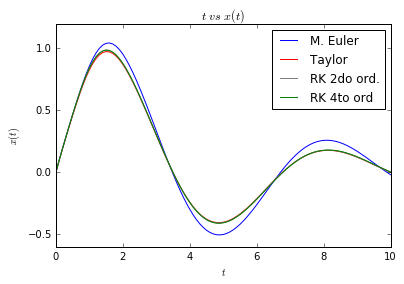

In [11]:
plot(sol_Eulert,sol_Eulery[:,0],"blue",label = "M. Euler")
plot(sol_Taylort,sol_Taylory[:,0],"red", label = "Taylor")
plot(sol_RK2ordt,sol_RK2ordy[:,0],"gray", label = "RK 2do ord.")
plot(sol_RK4ordt,sol_RK4ordy[:,0],"green",label = "RK 4to ord")
legend(loc = 0)
xlabel("$t$")
ylabel("$x(t)$")
title("$t\ vs\ x(t) $")
show()

Grafica de la solución para $x'(t)$ de nuestra ecuación diferencial usando los 4 integradores. Para cada uno de ellos el paso de integración es de $h = 0.1$ 

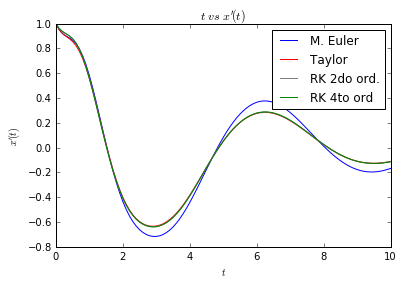

In [12]:
plot(sol_Eulert,sol_Eulery[:,1],"blue",label = "M. Euler")
plot(sol_Taylort,sol_Taylory[:,1],"red", label = "Taylor")
plot(sol_RK2ordt,sol_RK2ordy[:,1],"gray", label = "RK 2do ord.")
plot(sol_RK4ordt,sol_RK4ordy[:,1],"green",label = "RK 4to ord")
legend(loc = 0)
xlabel("$t$")
ylabel("$x'(t)$")
title("$t\ vs\ x'(t) $")
show()

Plano fase de nuestra ecuación diferencial

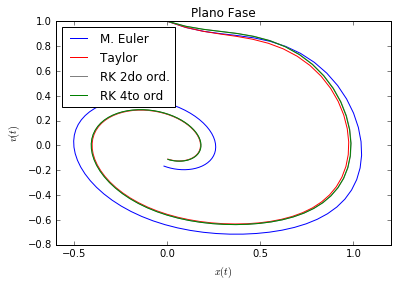

In [13]:
plot(sol_Eulery[:,0],sol_Eulery[:,1],"blue",label = "M. Euler")
plot(sol_Taylory[:,0],sol_Taylory[:,1],"red", label = "Taylor")
plot(sol_RK2ordy[:,0],sol_RK2ordy[:,1],"gray", label = "RK 2do ord.")
plot(sol_RK4ordy[:,0],sol_RK4ordy[:,1],"green",label = "RK 4to ord")
legend(loc = 0)
xlabel("$x(t)$")
ylabel("$v(t)$")
title("Plano Fase")
show()

#### 2. Utilizando los integradores anteriores se encontrará el mejor paso de integración para la ecuación:

$$
\dddot y + \ddot y^2 -3\dot y^3 + cos^2(y) = e^{-t} sin(3t)
$$

con valores iniciales:$y(1) = 1$, $\dot y(1) = 2$, $\ddot y(1) =1$

El sistema de ecuaciones a resolver está dado por:

In [14]:
def ec_dif2(y,t):
    return array([y[1],y[2],exp(-t)*sin(3*t)-(y[2]**2)+3*(y[1]**3)-(cos(y[0]))**2])
def d_ec_dif2(y,t):
    return array([0,0,cos(3*t)*exp(-t)-exp(-t)*sin(3*t)]),array([[0,1,0],[0,0,1],[2*cos(y[0])*sin(y[0]),9*y[1]**2,-2*y[2]]])

Procederemos a buscar el mejor paso de integración, para la ecuación; con cada uno de nuestros integradores, para ello se realizaran las integraciones con diferentes valores de $h$ de tal manera que nos sea posible determinar a partir de que valores de $h$ nuestra integración converge a la solución. 

In [15]:
h = [0.1,0.01,0.001,0.0001,0.00001]

Resolviendo con el método de Euler para tiempos $t\ \in \ [1,1.7]$

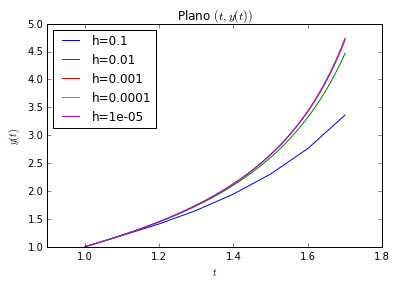

In [16]:
for i in h:
    sol2_Eulert,sol2_Eulery = euler_vec(ec_dif2,[1,2,1],[1,1.7],i)
    plot(sol2_Eulert,sol2_Eulery[:,0],label= "h="+str(i))
legend(loc = 0)
xlabel("$t$")
ylabel("$y(t)$")
title("Plano $(t,y(t))$")
show()

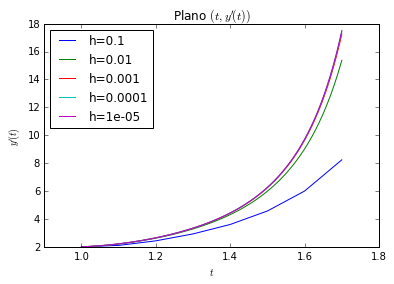

In [17]:
for i in h:
    sol2_Eulert,sol2_Eulery = euler_vec(ec_dif2,[1,2,1],[1,1.7],i)
    plot(sol2_Eulert,sol2_Eulery[:,1],label= "h="+str(i))
legend(loc = 0)
xlabel("$t$")
ylabel("$y'(t)$")
title("Plano $(t,y'(t))$")
show()

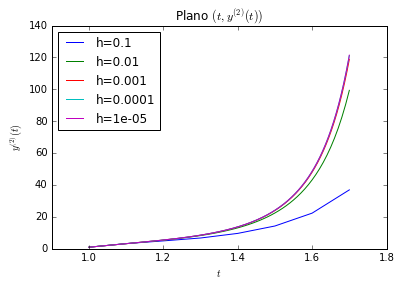

In [18]:
for i in h:
    sol2_Eulert,sol2_Eulery = euler_vec(ec_dif2,[1,2,1],[1,1.7],i)
    plot(sol2_Eulert,sol2_Eulery[:,2],label= "h="+str(i))
legend(loc = 0)
xlabel("$t$")
ylabel("$y^{(2)}(t)$")
title("Plano $(t,y^{(2)}(t))$")
show()

De los planos solución de la ecuación diferencial notamos que la integración con el método de Euler para $t \in [1,1.7]$ converge a la solución para pasos de orden $h \leq 0.001$

Resolviendo con el método de Taylor a 2º orden para tiempos $t\ \in \ [1,1.7]$

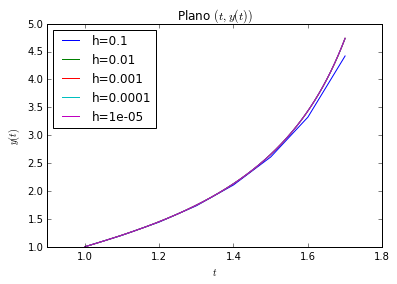

In [19]:
for i in h:
    sol2_Taylort,sol2_Taylory = taylor_2ord(ec_dif2,d_ec_dif2,[1,2,1],[1,1.7],i)
    plot(sol2_Taylort,sol2_Taylory[:,0],label= "h="+str(i))
legend(loc = 0)
xlabel("$t$")
ylabel("$y(t)$")
title("Plano $(t,y(t))$")
show()

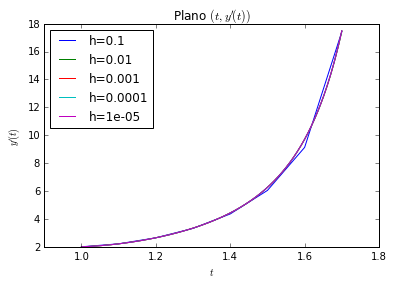

In [20]:
for i in h:
    sol2_Taylort,sol2_Taylory = taylor_2ord(ec_dif2,d_ec_dif2,[1,2,1],[1,1.7],i)
    plot(sol2_Taylort,sol2_Taylory[:,1],label= "h="+str(i))
legend(loc = 0)
xlabel("$t$")
ylabel("$y'(t)$")
title("Plano $(t,y'(t))$")
show()

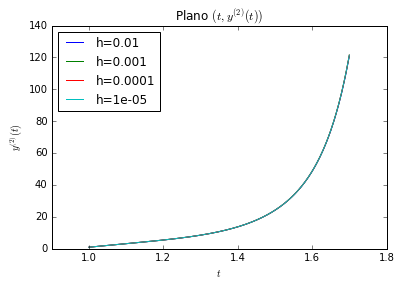

In [21]:
for i in range(1,5):
    sol2_Taylort,sol2_Taylory = taylor_2ord(ec_dif2,d_ec_dif2,[1,2,1],[1,1.7],h[i])
    plot(sol2_Taylort,sol2_Taylory[:,2],label= "h="+str(h[i]))
legend(loc = 0)
xlabel("$t$")
ylabel("$y^{(2)}(t)$")
title("Plano $(t,y^{(2)}(t))$")
show()

De los planos solución de la ecuación diferencial notamos que la integración con el método de Taylor a 2º orden converge a la solución en $t \in [1,1.7]$ para pasos de orden $h \leq 0.01$. Notar que para $y^{(2)}(t)$ no se anexa la solución en pasos de  $h=0.1$, esto debido a que el integrador no converge a la solución de la función.

Resolviendo con el método de Runge-Kutta de 2º orden para tiempos $t\ \in \ [1,1.7]$

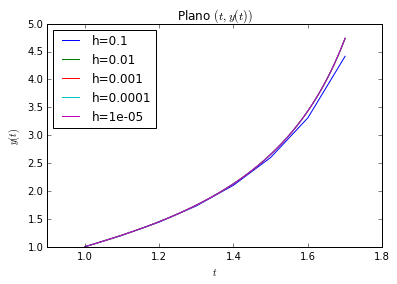

In [22]:
for i in h:
    sol2_RK2ordt,sol2_RK2ordy = RK_2ord(ec_dif2,[1,2,1],[1,1.7],i)
    plot(sol2_RK2ordt,sol2_RK2ordy[:,0],label= "h="+str(i))
legend(loc = 0)
xlabel("$t$")
ylabel("$y(t)$")
title("Plano $(t,y(t))$")
show()

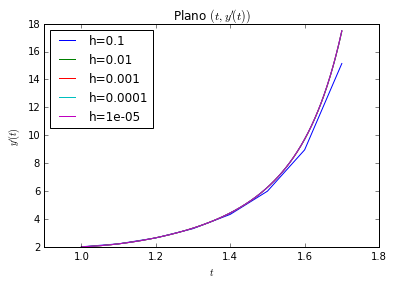

In [23]:
for i in h:
    sol2_RK2ordt,sol2_RK2ordy = RK_2ord(ec_dif2,[1,2,1],[1,1.7],i)
    plot(sol2_RK2ordt,sol2_RK2ordy[:,1],label= "h="+str(i))
legend(loc = 0)
xlabel("$t$")
ylabel("$y'(t)$")
title("Plano $(t,y'(t))$")
show()

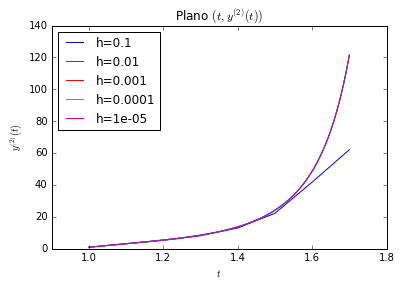

In [24]:
for i in h:
    sol2_RK2ordt,sol2_RK2ordy = RK_2ord(ec_dif2,[1,2,1],[1,1.7],i)
    plot(sol2_RK2ordt,sol2_RK2ordy[:,2],label= "h="+str(i))
legend(loc = 0)
xlabel("$t$")
ylabel("$y^{(2)}(t)$")
title("Plano $(t,y^{(2)}(t))$")
show()

Al igual que el método de Taylor a 2º orden, la integración con el método de Runge-Kutta a 2º orden en el intervalo $t \in [1,1.7]$ converge a la solución para $h \leq 0.01$

Resolviendo con el método de Runge-Kutta de 4º orden para tiempos $t\ \in \ [1,1.7]$

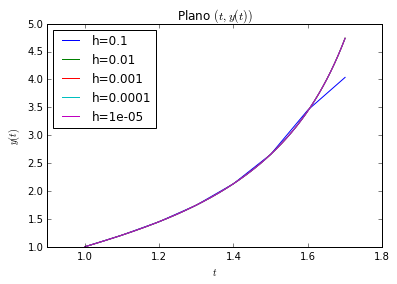

In [25]:
for i in h:
    sol2_RK4ordt,sol2_RK4ordy = RK_4ord(ec_dif2,[1,2,1],[1,1.7],i)
    plot(sol2_RK4ordt,sol2_RK4ordy[:,0],label= "h="+str(i))
legend(loc = 0)
xlabel("$t$")
ylabel("$y(t)$")
title("Plano $(t,y(t))$")
show()

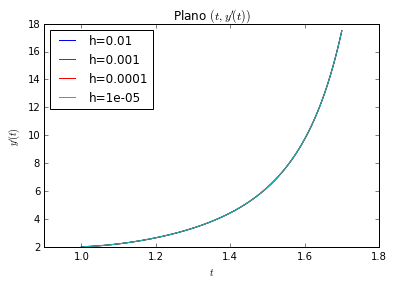

In [26]:
for i in range(1,5):
    sol2_RK4ordt,sol2_RK4ordy = RK_4ord(ec_dif2,[1,2,1],[1,1.7],h[i])
    plot(sol2_RK4ordt,sol2_RK4ordy[:,1],label= "h="+str(h[i]))
legend(loc = 0)
xlabel("$t$")
ylabel("$y'(t)$")
title("Plano $(t,y'(t))$")
show()

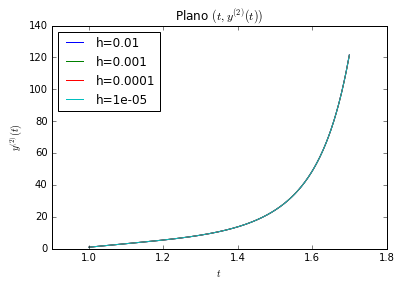

In [27]:
for i in range(1,5):
    sol2_RK4ordt,sol2_RK4ordy = RK_4ord(ec_dif2,[1,2,1],[1,1.7],h[i])
    plot(sol2_RK4ordt,sol2_RK4ordy[:,2],label= "h="+str(h[i]))
legend(loc = 0)
xlabel("$t$")
ylabel("$y^{(2)}(t)$")
title("Plano $(t,y^{(2)}(t))$")
show()

La integración con el método de Runge-Kutta de 4º orden en el intervalo $t \in [1,1.7]$ converge a la solución de la ecuación para pasos en $h \leq 0.01$.

Puesto que queremos ver que sucede alrededor de $t = 2$ proponemos que el paso de integración $h$ sea de la forma $h=10^{-5}$ para cada uno de nuestros integradores, de tal manera que nuestra integración converga a $y^i(t)$ con $i = 0,1,2$. 

In [28]:
delta_t =[1,1.95]
solucionEt,solucionEy = euler_vec(ec_dif2,[1,2,1],delta_t,0.00001)
solucionTt,solucionTy = taylor_2ord(ec_dif2,d_ec_dif2,[1,2,1],delta_t,0.00001)
solucionRK2t,solucionRK2y = RK_2ord(ec_dif2,[1,2,1],delta_t,0.00001)
solucionRK4t,solucionRK4y = RK_4ord(ec_dif2,[1,2,1],delta_t,0.00001)

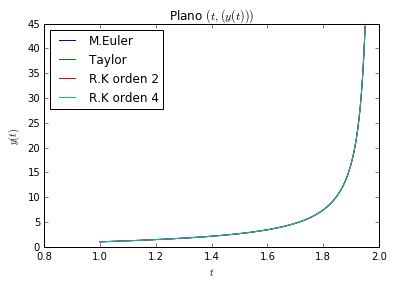

In [29]:
plot(solucionEt,solucionEy[:,0], label = "M.Euler")
plot(solucionTt,solucionTy[:,0],label = "Taylor")
plot(solucionRK2t,solucionRK2y[:,0],label = "R.K orden 2")
plot(solucionRK4t,solucionRK4y[:,0],label = "R.K orden 4")
legend(loc=0)
xlabel("$t$")
ylabel("$y(t)$")
title("Plano $(t,(y(t)))$")
show()

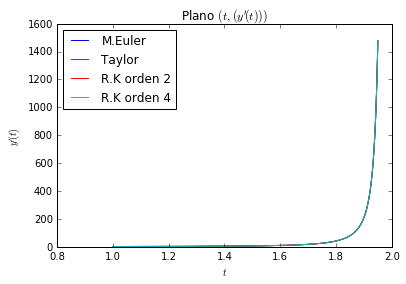

In [30]:
plot(solucionEt,solucionEy[:,1], label = "M.Euler")
plot(solucionTt,solucionTy[:,1],label = "Taylor")
plot(solucionRK2t,solucionRK2y[:,1],label = "R.K orden 2")
plot(solucionRK4t,solucionRK4y[:,1],label = "R.K orden 4")
legend(loc=0)
xlabel("$t$")
ylabel("$y'(t)$")
title("Plano $(t,(y'(t)))$")
show()

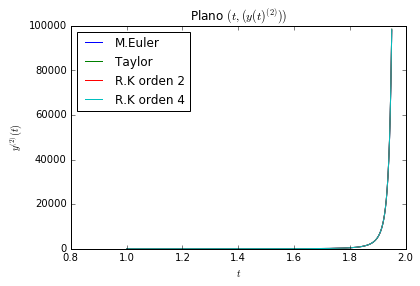

In [31]:
plot(solucionEt,solucionEy[:,2], label = "M.Euler")
plot(solucionTt,solucionTy[:,2],label = "Taylor")
plot(solucionRK2t,solucionRK2y[:,2],label = "R.K orden 2")
plot(solucionRK4t,solucionRK4y[:,2],label = "R.K orden 4")
legend(loc=0)
xlabel("$t$")
ylabel("$y^{(2)}(t)$")
title("Plano $(t,(y(t)^{(2)}))$")
show()

Al aproximarnos a $t =2$ notamos que $y^{(2)}(t)$ tiende a infinito, de tal manera que al querer encontrar una solución numerica para $y^{(i)}(t)$ con $i =0,1,2$ veremos que ésta tomaría valores muy grandes, es decir, que nuestra solución diverge. De ahí a que Python en su intento por aproximar graficamente la solución de la ecuación traze rectas que se van a infinito, perdiendo así el detalle del comportamiento de la solución en vecindades alrededor de $t=2$.

#### 3. Modificar las funciones integradoras en el problema 1 de tal manera que se puedan pasar argumentos opcionales al sistema de ecuaciones diferenciales.

Los códigos a usar son esencialmente los mismos que en el problema 1, salvo por una variante. Dentro de los argumentos que reciben nuestros integradores hemos anexado un argumento $"arg"$ que por default es cero, de tal manera que si este argumento "arg" es estrictamente cero, la integración de la función (ecuación diferencial) se realiza tal cual el problema 1. Por el contrario, si este argumento es distinto de cero, la integración de la función toma en cuenta el argumento y lo anexa dentro de los argumentos propios de la función a integrar; es decir, la función a integrar también debe estar programada de tal manera que ésta tome en cuenta posibles argumentos/parametros a la hora de ser integrada.

Método de Euler

In [32]:
def euler_vec_arg(funcion,p_ini,delta_t,arg= 0,h = 0.1): 
    tiempo = arange(delta_t[0],delta_t[1]+h,h)
    solucion = zeros((len(tiempo),len(p_ini)))
    solucion[0,:] = p_ini
    for i in xrange(len(tiempo)-1):
        if arg == 0:
            solucion[i+1,:] = solucion[i,:]+h*funcion(solucion[i,:],tiempo[i])
        else:
            solucion[i+1,:] = solucion[i,:]+h*funcion(solucion[i,:],tiempo[i],arg)
    return tiempo,solucion

Método con Serie de Taylor a 2º orden

In [33]:
def taylor_2ord_arg(funcion,d_funcion,p_ini,delta_t,arg = 0,h= 0.1):
    tiempo = arange(delta_t[0],delta_t[1]+h,h)
    solucion = zeros((len(tiempo),len(p_ini)))
    solucion [0,:] = p_ini
    for j in xrange (len(tiempo)-1):
        if arg == 0:
            func = funcion(solucion[j,:],tiempo[j])
            df,jac = d_funcion(solucion[j,:],tiempo[j])
            solucion [j+1,:] = solucion[j,:]+h*func+(0.5*h*h*(df+dot(jac,func)))
        else:
            func = funcion(solucion[j,:],tiempo[j],arg)
            df,jac = d_funcion(solucion[j,:],tiempo[j],arg)
            solucion [j+1,:] = solucion[j,:]+h*func+(0.5*h*h*(df+dot(jac,func)))
    return tiempo,solucion

Método de Runge-Kutta de 2º orden

In [34]:
def RK_2ord_arg(funcion,p_ini,delta_t,arg = 0,h=0.1):
    tiempo = arange(delta_t[0],delta_t[1]+h,h)
    solucion = zeros((len(tiempo),len(p_ini)))
    solucion[0,:] = p_ini
    for r in xrange(len(tiempo)-1):
        if arg == 0:
            k = h*funcion(solucion[r,:],tiempo[r])
            f = funcion(solucion[r,:]+(0.5)*k,tiempo[r]+0.5*h)
            solucion[r+1,:] = solucion[r,:]+h*f
        else:
            k = h*funcion(solucion[r,:],tiempo[r],arg)
            f = funcion(solucion[r,:]+(0.5)*k,tiempo[r]+0.5*h,arg)
            solucion[r+1,:] = solucion[r,:]+h*f
    return tiempo,solucion

Método de Runge-Kutta de 4º orden 

In [35]:
def RK_4ord_arg(funcion,p_ini,delta_t,arg=0,h=0.1):
    tiempo = arange(delta_t[0],delta_t[1]+h,h)
    solucion = zeros((len(tiempo),len(p_ini)))
    solucion[0,:] = p_ini
    for s in xrange(len(tiempo)-1):
        if arg ==0:
            k1 = funcion(solucion[s,:],tiempo[s])
            k2 = funcion(solucion[s,:]+0.5*h*k1,tiempo[s]+0.5*h)
            k3 = funcion(solucion[s,:]+0.5*h*k2,tiempo[s]+0.5*h)
            k4 = funcion(solucion[s,:]+h*k3,tiempo[s]+h)
            solucion[s+1,:] = solucion[s,:]+(h/6.)*(k1+(2*k2)+(2*k3)+k4)
        else:
            k1 = funcion(solucion[s,:],tiempo[s],arg)
            k2 = funcion(solucion[s,:]+0.5*h*k1,tiempo[s]+0.5*h,arg)
            k3 = funcion(solucion[s,:]+0.5*h*k2,tiempo[s]+0.5*h,arg)
            k4 = funcion(solucion[s,:]+h*k3,tiempo[s]+h,arg)
            solucion[s+1,:] = solucion[s,:]+(h/6.)*(k1+(2*k2)+(2*k3)+k4)
    return tiempo,solucion

Ahora se procederá a obtener la solución de la siguiente ecuación diferencial:

$$
\ddot x +\frac{1}{10}\dot x + 4sin(x) = \frac{1}{2}sin(\omega t)
$$

con condiciones iniciales $\dot x (0)=1$ y $x(0) = 0$ para $\omega=1,1.1,1.2,...,3$

Tal como ya se mencionó anteriormente, la ecuación diferencial a resolver debe programarse de tal manera que esta puede recibir parámetros opcionales. Para ello se sigue el mismo principio que con los integradores: En este caso, si el parámetro omega es estrictamente igual a cero, entonces la ecuación difrencial a resolver es tal que no toma en cuenta a omega, sin embargo; si omega es distinta de cero, entonces omega debe ser considerada en la ecuación a la hora que esta sea resuelta.

In [36]:
def ec_dif3(y,t,omega=0):
    if omega ==0:
        return array([y[1],(0.5)*sin(t)-4*sin(y[0])-(0.1)*y[1]])
    else:
        return array([y[1],(0.5)*sin(omega*t)-4*sin(y[0])-(0.1)*y[1]])

In [37]:
def d_ec_dif3(y,t,omega=0):
    if omega == 0:
        return array([0,(0.5)*cos(t)]),array([[0,1],[-4*cos(y[0]),-0.1]])
    else:
        return array([0,(0.5)*omega*cos(omega*t)]),array([[0,1],[-4*cos(y[0]),-0.1]])

A continuación se resuelve el sistema de ecuaciones con cada uno de los integradores modificados. Para poder encontrar la solución para toda $\omega$ definimos una serie de variables $omega_i =1$ que tomarán valores desde 1 hasta 3 a través de un ciclo $while$.
Usando el método de Euler se grafica la solución para $x(t)$, mientras que con Taylor a 2º orden se grafica la solución de $x'(t)$. Finalmente con los integradores de Runge-Kutta, de 2º y 4º orden, se grafica el plano fase de la ecuación.

Resolviendo con el Método de Euler:

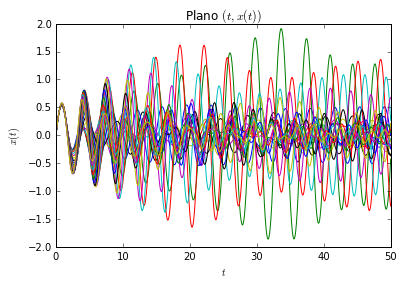

In [38]:
t=1
while t <3:
    sol3_Eulert,sol3_Eulery = euler_vec_arg(ec_dif3,[0,1],[0,50],t,0.001) #Se tomo h = 0.001 para que la integración converga
    plot(sol3_Eulert,sol3_Eulery[:,0])
    t+= 0.1
xlabel("$t$")
ylabel("$x(t)$")
title("Plano $(t,x(t))$")
show()

Resolviendo con el método con Serie de Taylor a 2º orden

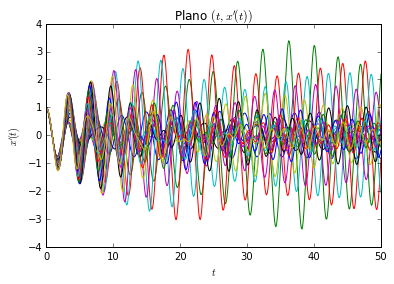

In [39]:
p = 1
while p <3:
    sol3_Taylort,sol3_Taylory = taylor_2ord_arg(ec_dif3,d_ec_dif3,[0,1],[0,50],p)
    plot(sol3_Taylort,sol3_Taylory[:,1])
    p += 0.1
xlabel("$t$")
ylabel("$x'(t)$")
title("Plano $(t,x'(t))$")
show()

Resolviendo con método de Runge-Kutta de 2º orden

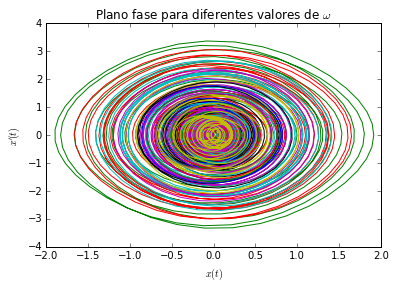

In [40]:
q = 1
while q <3:
    sol3_RK2ordt,sol3_RK2ordy = RK_2ord_arg(ec_dif3,[0,1],[0,50],q)
    plot(sol3_RK2ordy[:,0],sol3_RK2ordy[:,1])
    q += 0.1
xlabel("$x(t)$")
ylabel("$x'(t)$")
title("Plano fase para diferentes valores de $\omega$")
show()

Resolviendo con método de Runge-Kutta de 4º Orden 

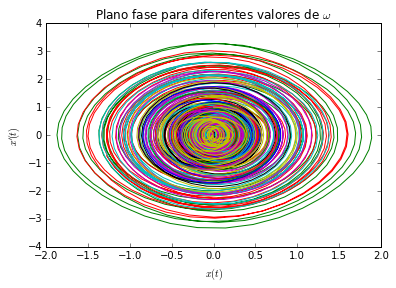

In [41]:
z = 1
while z <3:
    sol3_RK4ordt,sol3_RK4ordy = RK_4ord_arg(ec_dif3,[0,1],[0,50],z)
    plot(sol3_RK4ordy[:,0],sol3_RK4ordy[:,1])
    z += 0.1
xlabel("$x(t)$")
ylabel("$x'(t)$")
title("Plano fase para diferentes valores de $\omega$")
show()

Se observa que la frecuencia de la función solución $x(t)$ es una función de $\omega$, de ahí el desface entre las gráficas para cada $\omega$ dado. De igual manera, podemos observar que conforme el sistema evoluciona en el tiempo $x(t)$ crece y decrece. 

#### 4. Se tiene el siguiente sistema de ecuaciones diferenciales:
$$
\dot x = 10(y-x)\\
\dot y = x(28-z)-y\\
\dot z = xy-\frac{8}{3}z
$$

Realizar una integración numérica del sistema de ecuaciones con alguno de los integradores

Comenzamos programando el sistema de ecuaciones a resolver:

In [42]:
def sist_ed(y,t):
    return array([10*(y[1]-y[0]),y[0]*(28-y[2])-y[1],y[0]*y[1]-(8/3.)*y[2]])

Para resolver el sistema de ecuaciones usaremos el método de Runge-Kutta de 4º orden pues sabemos que su error es de $O(h^5)$

#### a) Se elige como condición inicial $[x_0,y_0,z_0] = [1,-2,4]$ y se procede a realizar las gráficas de la solución en el plano $xy,\ xz$ y $yz$

In [43]:
sol_sist_ec= RK_4ord_arg(sist_ed,[1,-2,4],[0,100],h= 0.01)

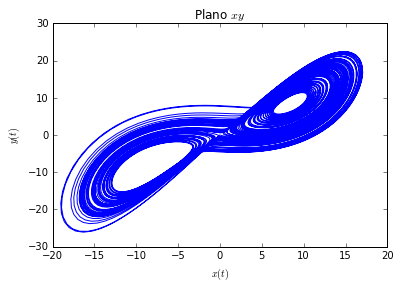

In [44]:
plot(sol_sist_ec[1][:,0],sol_sist_ec[1][:,1])
xlabel("$x(t)$")
ylabel("$y(t)$")
title("Plano $xy$")
show()

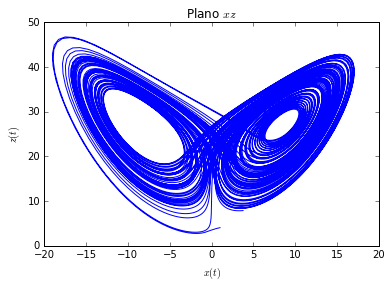

In [45]:
plot(sol_sist_ec[1][:,0],sol_sist_ec[1][:,2])
xlabel("$x(t)$")
ylabel("$z(t)$")
title("Plano $xz$")
show()

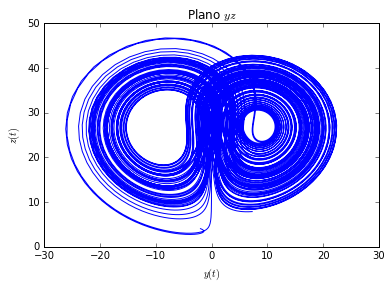

In [46]:
plot(sol_sist_ec[1][:,1],sol_sist_ec[1][:,2])
xlabel("$y(t)$")
ylabel("$z(t)$")
title("Plano $yz$")
show()

Dado que el sistema de ecuaciones diferenciales representa el atractor de Lorenz, se sabe que para ciertos valores de $\beta$ en $\dot y$, con $\beta \in \mathbb{R}$,  el sistema se vuelve un sistema caótico. En particular, con $\beta = 28$ el sistema es caótico. 

#### b) Dar 3 condiciones iniciales parecidas, es decir; difiriendo las 3 condiciones iniciales unicamente en la coordenada $y$ por una diferencia de $10^{-2}$.

Se proponen las siguientes 3 condiciones iniciales:

$$
[x_{01},y_{01},z_{01}] = [2,0.1,-3]\\
[x_{02},y_{02},z_{02}] = [2,0.11,-3]\\
[x_{03},y_{03},z_{03}]= [2,0.09,-3]
$$

In [47]:
solucion1= RK_4ord_arg(sist_ed,[2,0.1,-3],[0,100],h= 0.01)
solucion2= RK_4ord_arg(sist_ed,[2,0.11,-3],[0,100],h= 0.01)
solucion3= RK_4ord_arg(sist_ed,[2,0.09,-3],[0,100],h= 0.01)

De tal manera que el plano $xy$ para las 3 condiciones iniciales queda dado por:

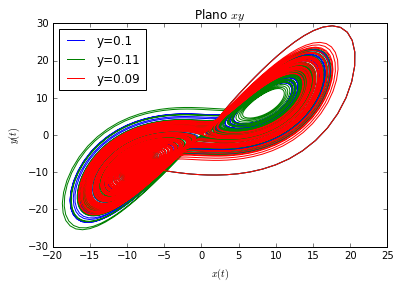

In [48]:
plot(solucion1[1][:,0],solucion1[1][:,1],label = "y=0.1")
plot(solucion2[1][:,0],solucion2[1][:,1],label = "y=0.11")
plot(solucion3[1][:,0],solucion3[1][:,1],label = "y=0.09")
xlabel("$x(t)$")
ylabel("$y(t)$")
title("Plano $xy$")
legend(loc=0)
show()

Mientras que los otros planos $xz$ y $yz$ están dados por:

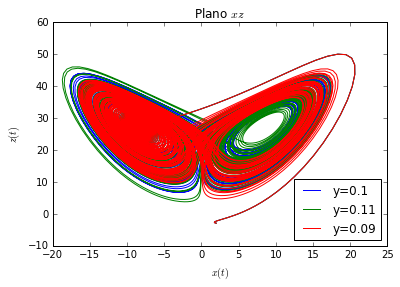

In [49]:
plot(solucion1[1][:,0],solucion1[1][:,2],label = "y=0.1")
plot(solucion2[1][:,0],solucion2[1][:,2],label = "y=0.11")
plot(solucion3[1][:,0],solucion3[1][:,2],label = "y=0.09")
xlabel("$x(t)$")
ylabel("$z(t)$")
title("Plano $xz$")
legend(loc=0)
show()

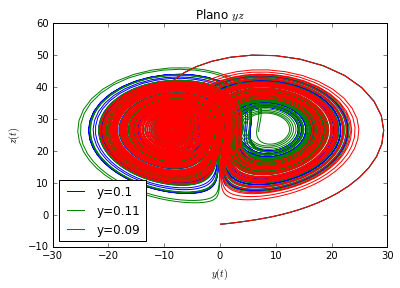

In [50]:
plot(solucion1[1][:,1],solucion1[1][:,2],label = "y=0.1")
plot(solucion2[1][:,1],solucion2[1][:,2],label = "y=0.11")
plot(solucion3[1][:,1],solucion3[1][:,2],label = "y=0.09")
xlabel("$y(t)$")
ylabel("$z(t)$")
title("Plano $yz$")
legend(loc=0)
show()

Puesto que el sistema es caótico, pequeñas cambios en las condiciones iniciales del sistema traen consigo una evolución diferente del sistema a lo largo del tiempo. Es de resaltarse que el modelo de Lorenz fue resultado del estudio del clima en la atmósfera terrestre, de ahí a que predecir el clima suela ser tan complicado.  